# Table of content
<ul>
Data Wrangling
<li><a href="#preprocessing">Preprocessing Text</a></li>
Data Viz
<li><a href="#word_freq">Word Frequency</a></li> 
   <li><a href="#freqword">Word Occurence Time Series </a></li>
<li><a href="#topic">Topic Modelling</a></li> 
    <li><a href="#coherent_model">Topic Modelling Coherent </a></li>
  <li><a href="#cluster_topic">Topic Clustering of documents</a></li>
<li><a href="#similar_topic">Similarity Topic Finder</a></li>

<li><a href="#dominant_topic">Dominant Topic in documents</a></li>

<li><a href="#ner"> Named Entity Recognition</a></li>
</ul>

In [1]:
# pip install pandas matplotlib bs4 wordcloud seaborn spacy nltlk install gensim pyLDAvis numpy re string 

In [2]:
import pandas as pd
import numpy as np
import re
import string
import unicodedata

"""data visualization"""

import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
import seaborn as sns
from matplotlib import rc

"""to supress warning"""

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

"""text cleaning"""

from bs4 import BeautifulSoup

"""stopwords, tokenizer, stemmer"""



import spacy
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

#nltk.download('punkt')
#nltk.download('wordnet')

"""additional processing"""

import gensim
import gensim.corpora as corpora
from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
from gensim.corpora import Dictionary 
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess 

from collections import Counter

"""ML modelling"""

# Enable logging for gensim - optional
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

#conda install -c conda-forge pyldavis
from sklearn.decomposition import LatentDirichletAllocation

#pip install flair

import pyLDAvis

from matplotlib import gridspec
import math
#pip install pyLDAvis.sklearn
import pyLDAvis.sklearn

from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#nltk.download('averaged_perceptron_tagger')

/home/criuser/miniconda3/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/home/criuser/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# I - Read Data 

In [4]:
global_df = pd.read_csv('global_df.csv')

global_df.head(5)

id  user_id                        created_at  \
0  6997.0      884  2016-03-14 17:40:17.744000+00:00   
1  3798.0      884         2014-02-24 22:58:11+00:00   
2  8586.0      884  2016-11-05 13:46:33.686000+00:00   
3  7124.0      884  2016-04-14 13:50:17.159000+00:00   
4  8707.0      884  2016-11-15 18:36:40.786000+00:00   

                                              cooked  post_number  \
0  <p>The size of the mask plus electronics is ra...          3.0   
1  <aside class="quote no-group quote-modified" d...          4.0   
2  <p>The <a href="https://biostrap.com">Biostrap...         15.0   
3  <p>I’ve <a href="http://www.quantifiedbob.com/...          1.0   
4  <p>Personally, I want to be able to access tim...          6.0   

                         updated_at  reply_count  reply_to_post_number  \
0  2016-03-14 17:40:42.276000+00:00          1.0                   2.0   
1  2015-10-21 04:24:48.934000+00:00          0.0                   NaN   
2  2016-11-05 13:47:19.301000+00:00          1.0                   NaN   
3  2016-04-14 13:50:17.159000+00:00          0.0                   NaN   
4  2016-11-15 18:36:40.786000+00:00          1.0                   NaN   

   quote_count  incoming_link_count  ...  \
0          0.0                 10.0  ...   
1          1.0                  0.0  ...   
2          0.0                 20.0  ...   
3          0.0                878.0  ...   
4          0.0                  4.0  ...   

                                        cleaned_text  \
0  mask plus electronics bulky foam material unde...   
1  agaricus restedness point scale knowing middle...   
2  biostrap looks promising shipping december cla...   
3  posted lengthy writeup recent experience repli...   
4  personally able access series data breath temp...   

                                         lemmat_text  \
0  mask plus electronics bulky foam material unde...   
1  agaricus restedness point scale know middle co...   
2  biostrap look promise ship december claim offe...   
3  post lengthy writeup recent experience replica...   
4  personally able access series data breath temp...   

                                          token_text  \
0  ['mask', 'plus', 'electronics', 'bulky', 'foam...   
1  ['agaricus', 'restedness', 'point', 'scale', '...   
2  ['biostrap', 'look', 'promise', 'ship', 'decem...   
3  ['post', 'lengthy', 'writeup', 'recent', 'expe...   
4  ['personally', 'able', 'access', 'series', 'da...   

                                          no_sw_text  \
0  mask plus electronics bulky foam material unde...   
1  agaricus restedness point scale middle cover l...   
2  biostrap promise ship december claim offer hr ...   
3  post lengthy writeup recent experience replica...   
4  personally able access series data breath temp...   

                                         noHTML_text  \
0   The size of the mask plus electronics is rath...   
1   \n \n  \n  Agaricus: \n \n For “restedness” I...   
2   The  Biostrap  looks promising (and is shippi...   
3   I’ve  posted a lengthy writeup of my recent e...   
4   Personally, I want to be able to access time ...   

                                      lemma_LDA_text  \
0  mask electronics material mask sweat issue str...   
1  agaricus restedness point scale cover range fo...   
2  biostrap claim offer hr ppg sensor hrv rest re...   
3  experience diet study cell metabolism institut...   
4  access series data breath tempo second second ...   

                                      no_sw_LDA_text  \
0  mask electronics material mask sweat issue str...   
1  agaricus restedness point scale cover range fo...   
2  biostrap claim offer hr ppg sensor hrv rest re...   
3  experience diet study cell metabolism institut...   
4  access series data breath tempo second second ...   

                                       token_NN_text  \
0  ['mask', 'electronics', 'material', 'mask', 's...   
1  ['agaricus', 'restedness', 'point', 'scale', '...   
2  ['biostrap', 'c

In [5]:
global_df.shape

(10282, 49)

In [6]:
global_df = global_df.iloc[global_df.astype(str).drop_duplicates().index]

In [7]:
global_df.shape

(10282, 49)

In [8]:
# getting rows with topic/post content

global_df = global_df[global_df.cooked != '0']
global_df.shape

(10282, 49)

# II - Exploratory Data Analysis

<a id='preprocessing'></a>

## 1 - Preprocessing Topic/Post Text 
* Data Wrangling
* Text cleaning
* Text normalization (Lemmatization)
* Text Tokenization / Remove stop words

In [9]:
global_df['creation_date'] = pd.to_datetime(global_df['created_at'], format='%Y-%m-%d %H:%M:%S.%f') 
global_df['creation_year'] = global_df['creation_date'].dt.year

### Clean Text

In [10]:
# Remove html code <p>
def remove_html(text):
    pattern = re.compile('<[^<]+?>')
    text = re.sub(pattern, ' ', text)
    return text

In [11]:
global_df['noHTML_text'] = global_df.cooked.apply(lambda x: remove_html(x))

In [12]:
global_df.to_csv('global_df.csv', header = True, encoding='utf-8', index=False)

In [13]:
# Function to clean text

def clean_text(text):
    
    # Remove html code <p>
    pattern = re.compile('<[^<]+?>')
    text = re.sub(pattern, ' ', text)
    
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/\S+','',text)
    
    # lowercase
    text =text.lower()
    

    # Remove ticks, apostrophes and letters after " 's "
    text = re.sub("\’\w+", '', text)
    text = re.sub("\'\w+", '', text)
    
    
    # Remove all types of nums
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text)
    text = re.sub(r"\b\d+\b", ' ', text)
    
    # Remove specific punctuations
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    
    # Remove accents "é"
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # remove the hashtag symbol #
    text = re.sub(r'#','',text)
   # text = re.sub(r'[-./]', ' ', text)
    
    return text

In [14]:
global_df['cleaned_text'] = global_df.cooked.apply(lambda x: clean_text(x))

# Compare between Original Text & Clean Text

pd.options.display.max_colwidth = 300
global_df[['cooked', 'cleaned_text']].head(1)

cooked  \
0  <p>The size of the mask plus electronics is rather bulky and the foam material on the underside of the mask sometimes makes my forehead sweat so I’m guessing the slippage issue/waking me up is being caused by this.</p>\n<p>The mask has an elastic strap, but unfortunately it’s non-adjustable. I’m...   

                                                                                                                                                                                                                                                                                                  cleaned_text  
0   the size of the mask plus electronics is rather bulky and the foam material on the underside of the mask sometimes makes my forehead sweat so i guessing the slippage issue waking me up is being caused by this the mask has an elastic strap but unfortunately it non adjustable i thinking about cut...

### Clean StopWords

In [15]:
# to avoid OS error run following command
# !python3 -m spacy download en_core_web_sm

In [16]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [17]:
# Holistic stop words function

nlp = spacy.load('en_core_web_sm')

set1 = list(nlp.Defaults.stop_words)
set2 = list(STOPWORDS)
set3 = list(stopwords.words('english'))

extra_set = ['ill', 'hi', 'im', 'ive', 'dont', 'hello', 'hey', 'like', 'thanks', 'maybe', 'q', 'e g', 'think', 'good', 'com', 'hop',
             'thats', 'c', 'b', 'l', 'il', 'x', 'z', 'v', 'f', 'e', 'q', 'isnt', 'wont', 'yes', 'want', 'let', 'know', 'id', 'g', 'thing',
             'thank', 'come', 'mm', 'w', 'non', 'day', 'look', 'baby', 'n', 'lot', 'way', 'use', 'try', 'hour', 'couple', 'week', 'ago',
             'i', 'h', 'et', 'img', 'cool', 'year', 'u', 'need', 'nice', 'guy', 'boy', 'pm', '3rd', 'pretty', 'sure', 'bit', 'week', 'minute',
             'png', 'screen', 'shot', 'sans', 'serif', 'mon', 'mar', 'kb', 'gmt', 'arial', 'helvetica', 'feb', 'long', 'period', 'time', 'font', 
             'size', 'medium', 'interested', 'dat', 'drank', 'dad', 'bottle', 'turn', 'number', 'everyday', 'follow', 'life', 'jar', 'j','www',
             'happen', 'yeah', 'wish', 'love', 'cheer', 'fun', 'later', 'bad', 'unfortunately', 'org', 'july', 'ki', 'february', 'month', 'saw',
             'potentially', '21st', 'hf', 'rr', 'lf', 'wait', 'yay', 'especially', 'feel', 'go']

stop_words_list = set1 + set2 + set3 + extra_set


# remove stopwords
def remove_stopwords(text): 
    slist = [word for word in text.split() if word not in stop_words_list]
    text = (" ").join(slist)
    return text

In [18]:
global_df['cleaned_text'] = global_df.cleaned_text.apply(lambda x: remove_stopwords(x))

###    Lemmatize Words  

In [19]:
# Function To Lemmatize Words To Its Root Form

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
        
# Lemmatization function
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [20]:
# to avoid errors with nltk library download the following 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [21]:
global_df['lemmat_text'] = global_df.cleaned_text.apply(lambda x: lemmatize_sentence(x))

In [22]:
global_df['lemmat_text'] = global_df.lemmat_text.apply(lambda x: remove_stopwords(x))

### Create Lemmetized text POS Noun for LDA Model

In [23]:
# Function To Lemmatize Words To Its Root Form and keep only NOUN 'NN' POS tag

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_n_tag(nltk_tag):
    if nltk_tag.startswith('N'):
        return wordnet.NOUN 
    else:          
        return None
        
# Lemmatization function
def lemma_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_n_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            pass
        
        else: 
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
            
    return " ".join(lemmatized_sentence)

In [24]:
global_df['lemma_LDA_text'] = global_df.cleaned_text.apply(lambda x: lemma_sentence(x))

In [25]:
global_df['lemma_LDA_text'] = global_df.lemma_LDA_text.apply(lambda x: remove_stopwords(x))

### Tokenize words 

In [26]:
# Tokenize Text 
def tokenize_text(text):
    filtered_text = []
    words = word_tokenize(text) 

    for word in words:
        filtered_text.append(word)
                
    return filtered_text

In [27]:
# tokenize all POS text
global_df['token_text'] = global_df.lemmat_text.apply(lambda x: tokenize_text(x))
# tokenize NOUN only POS text
global_df['token_NN_text'] = global_df.lemma_LDA_text.apply(lambda x: tokenize_text(x))

In [28]:
global_df[['lemmat_text', 'lemma_LDA_text']].head()

lemmat_text  \
0                                                                                                                                              mask plus electronics bulky foam material underside mask forehead sweat guess slippage issue wake cause mask elastic strap adjustable cut reattaching stay snug   
1  agaricus restedness point scale middle cover large range allow focus extreme gary point pick scale data constantly establish threshold value example pain wise value compare establish value mean relation large set data original measure adjust begin point scale convert point scale double value ear...   
2                                       biostrap promise ship december claim offer hr ppg sensor hrv rest spo2 respiration rate sleep analysis secondary sensor clip shoe assist exercise activity track offer api access launch ask open api access reply plan open api launch likely future customer request   
3  post lengthy writeup recent experience replicate fast mimic diet base study publish cell metabolism fund national institute age researcher cut daily calorie half reduce biomarkers age diabetes heart disease cancer adverse effect main guideline total caloric intake kcal lb body weight protein fat...   
4                                                                                                                                                                                        personally able access series data breath tempo inhale second hold second exhale second hold second vs average breath   

                                                                                                                                                                                                                                                                                                lemma_LDA_text  
0                                                                                                                                                                                                                                                   mask electronics material mask sweat issue strap stay snug  
1                                                                                                     agaricus restedness point scale cover range focus extreme point pick scale data threshold value example wise value value relation data measure point scale convert point scale value measure granularity  
2                                                                                                                                                        biostrap claim offer hr ppg sensor hrv rest respiration rate analysis sensor clip exercise activity access launch access plan launch customer request  
3  experience diet study cell metabolism institute researcher calorie biomarkers diabetes heart disease cancer effect guideline intake lb body carbs intake lb body carbs calorie calorie ketone mid mmol ketosis ketosis result body loss weight body muscle mass effect rebound effect testosterone focus...  
4                                                                                                                                                                                                                                           access series data breath tempo second second second second breath

In [29]:
global_df.to_csv('global_df.csv', header = True, encoding='utf-8', index=False)

<a id='word_freq'></a>
## 2 - Word frequency analysis

### Word Frequency Data Viz

In [30]:
global_df.columns

Index(['id', 'user_id', 'created_at', 'cooked', 'post_number', 'updated_at',
       'reply_count', 'reply_to_post_number', 'quote_count',
       'incoming_link_count', 'reads', 'readers_count', 'topic_id',
       'reply_to_user', 'stream', 'tags', 'title', 'posts_count', 'views',
       'like_count', 'closed', 'category_id', 'word_count', 'featured_link',
       'time_read', 'likes_received', 'likes_given', 'topics_entered',
       'topic_count', 'post_count', 'posts_read', 'days_visited', 'username',
       'name', '_merge', 'first_post', 'last_post', 'lifespan',
       'lifespan_days', 'cleaned_text', 'lemmat_text', 'token_text',
       'no_sw_text', 'noHTML_text', 'lemma_LDA_text', 'no_sw_LDA_text',
       'token_NN_text', 'creation_date', 'creation_year'],
      dtype='object')

In [31]:
mylist = []
for string in global_df['lemmat_text']:
    mylist.append(string)
mylist

new_text = str(mylist)
#tokenization
txt_tokens = word_tokenize(new_text)
words=[word.lower() for word in txt_tokens if word.isalpha()]

In [32]:
# Frequency Distribution Plot
fdist = FreqDist(words)
df_fdist = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])

#top 30 words 
df_fdist30 = df_fdist.sort_values(['frequency'], ascending=False).head(30)

Text(0.5, 1.0, 'TOP 30 frequent words which occurred in the posts/topics')

<Figure size 1440x720 with 0 Axes>

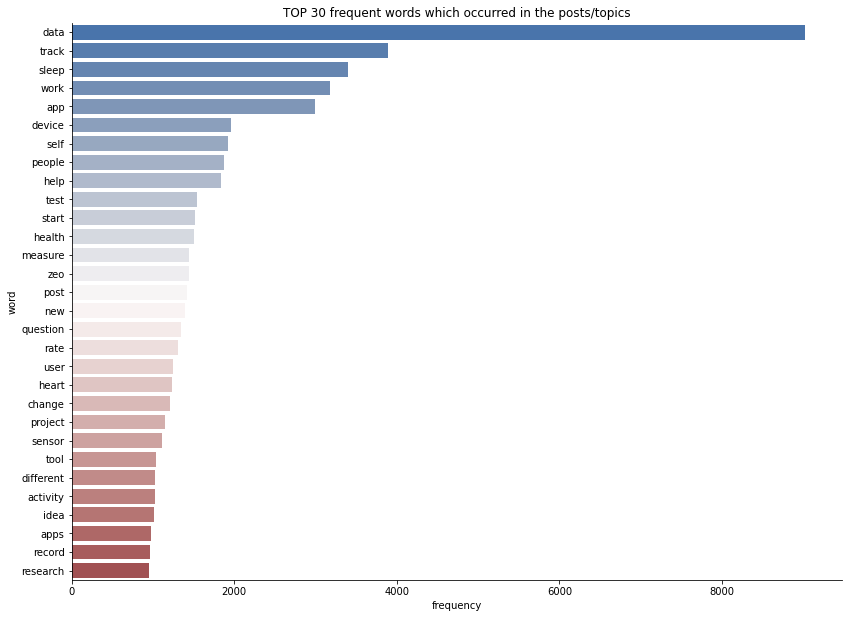

In [34]:
#ploting top 20 words 
plt.figure(figsize=(20,10))
sns.catplot(y="word", x="frequency", kind="bar", palette="vlag", data=df_fdist30, height=8.27, aspect=11.7/8.27)
plt.title('TOP 30 frequent words which occurred in the posts/topics')

## word frequency for 2020/2021

In [59]:
df_21 = global_df[(global_df['creation_year'] == 2021) | (global_df['creation_year'] == 2020)]

In [61]:
mylist = []
for string in df_21['cleaned_text']:
    mylist.append(string)
mylist

new_text = str(mylist)
#tokenization
txt_tokens = word_tokenize(new_text)
words_21 = [word.lower() for word in txt_tokens if word.isalpha()]

In [62]:
# Frequency Distribution Plot
fdist = FreqDist(words_21)
df_fdist = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])

#top 30 words 
df_fdist30 = df_fdist.sort_values(['frequency'], ascending=False).head(30)

In [ ]:
df_fdist30

## 3 - Word cloud

In [ ]:
# using list comprehension 
listToStr= ' '.join(map(str, words)) 

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100, colormap='vlag',
                      background_color="white", collocations=True).generate(listToStr)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of TOP 100 frequent words for all posts/topics')
plt.axis("off")
plt.show()

### QS Image WordCloud

In [ ]:
# using list comprehension 
QS_word = ' '.join(map(str, words))

# open the image and use np.array to transform the file to an array


cand_mask= np.array(Image.open('QS.png'))

# take all values greater than 3 and transfer 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask= np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(background_color='white',
                      contour_color='blue',
                      mask=cand_mask,
                      contour_width=2).generate(QS_word)


#plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of TOP frequent words for Users posts/topics')
plt.axis('off')
plt.show()

## 4 - Bigrams
- List most occured bigrams in the posts/topics to explore more in depth

In [ ]:
#top 20 bigrams 
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
bigrams_top = pd.DataFrame(bigrams_series.sort_values(ascending=False))
bigrams_top = bigrams_top.reset_index().rename(columns={'index': 'bigrams', 0:'counts'})
bigrams_top
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='bigrams', kind="bar", palette="vlag", data=bigrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 pair words which occurred in the topics/posts')

In [ ]:
#top 20 trigrams 
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
trigrams_top = pd.DataFrame(trigrams_series.sort_values(ascending=False))
trigrams_top = trigrams_top.reset_index().rename(columns={'index': 'trigrams', 0:'counts'})
trigrams_top
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='trigrams', kind="bar", palette="vlag", data=trigrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 three words which occurred together in the topics/posts')

In [ ]:
#top 20 trigrams 
fourgrams_series = (pd.Series(nltk.ngrams(words, 4)).value_counts())[:20]
fourgrams_top = pd.DataFrame(fourgrams_series.sort_values(ascending=False))
fourgrams_top = fourgrams_top.reset_index().rename(columns={'index': 'fourgrams', 0:'counts'})
fourgrams_top
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='fourgrams', kind="bar", palette="vlag", data=fourgrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 three words which occurred together in the topics/posts')

### 4.1 Keyword Analysis: Lexical Dispersion Plot

In [66]:
test = global_df.copy()

In [67]:
# calculating the most frequent words' occurence in each thread 

test['data'] = test['no_sw_text'].str.count('data')
test['track'] = test['no_sw_text'].str.count('track')
test['sleep'] = test['no_sw_text'].str.count('sleep')
test['work'] = test['no_sw_text'].str.count('work')
test['app'] = test['no_sw_text'].str.count('app')
test['device'] = test['no_sw_text'].str.count('device')
test['self'] = test['no_sw_text'].str.count('self')
test['people'] = test['no_sw_text'].str.count('people')
test['help'] = test['no_sw_text'].str.count('help')
test['test'] = test['no_sw_text'].str.count('test')
test['start'] = test['no_sw_text'].str.count('start')
test['health'] = test['no_sw_text'].str.count('health')
test['measure'] = test['no_sw_text'].str.count('measure')
test['zeo'] = test['no_sw_text'].str.count('zeo')
test['post'] = test['no_sw_text'].str.count('post')
test['new'] = test['no_sw_text'].str.count('new')
test['question'] = test['no_sw_text'].str.count('question')
test['rate'] = test['no_sw_text'].str.count('rate')
test['user'] = test['no_sw_text'].str.count('user')
test['heart'] = test['no_sw_text'].str.count('heart')
test['change'] = test['no_sw_text'].str.count('change')
test['project'] = test['no_sw_text'].str.count('project')
test['sensor'] = test['no_sw_text'].str.count('sensor')
test['tool'] = test['no_sw_text'].str.count('tool')
test['different'] = test['no_sw_text'].str.count('different')
test['activity'] = test['no_sw_text'].str.count('activity')
test['idea'] = test['no_sw_text'].str.count('idea')
test['apps'] = test['no_sw_text'].str.count('apps')
test['record'] = test['no_sw_text'].str.count('record')
test['research'] = test['no_sw_text'].str.count('research')

In [68]:
words_df = test.groupby('creation_year')['data', 'track', 'sleep', 'work', 'app', 'device',
                             'self', 'people', 'help', 'test','start', 'health', 
                             'measure', 'zeo', 'post', 'new', 'question', 'rate',
                             'user', 'heart', 'change', 'project', 'sensor', 'tool', 'different',
                             'activity', 'idea', 'apps', 'record', 'research'].sum()
words_df

<ipython-input-68-271ac090cfdd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  words_df = test.groupby('creation_year')['data', 'track', 'sleep', 'work', 'app', 'device',


data  track  sleep   work     app  device   self  people  \
creation_year                                                               
2011            549.0  312.0  207.0  299.0   397.0    72.0  248.0   227.0   
2012            826.0  401.0  208.0  297.0   573.0   118.0  181.0   227.0   
2013           2072.0  680.0  792.0  829.0  1339.0   432.0  335.0   340.0   
2014           1597.0  837.0  736.0  749.0  1245.0   404.0  356.0   306.0   
2015            815.0  472.0  247.0  304.0   778.0   177.0  175.0   117.0   
2016           1080.0  470.0  566.0  360.0   821.0   253.0  133.0   161.0   
2017            426.0  427.0  340.0  223.0   487.0   122.0  121.0   112.0   
2018            426.0  282.0  203.0  202.0   395.0   121.0   78.0   102.0   
2019            729.0  449.0  226.0  290.0   587.0   111.0  169.0   129.0   
2020            909.0  570.0  195.0  356.0   636.0   127.0  257.0   140.0   
2021            293.0  178.0  165.0  153.0   161.0    41.0   58.0    45.0   

                help   test  ...  change  project  sensor   tool  different  \
creation_year                ...                                              
2011           203.0  170.0  ...   149.0     97.0    66.0   87.0       71.0   
2012           161.0  141.0  ...    96.0     96.0    32.0  118.0      117.0   
2013           417.0  216.0  ...   283.0    178.0   320.0  160.0      208.0   
2014           353.0  276.0  ...   170.0    197.0   324.0  222.0      171.0   
2015           172.0   79.0  ...   106.0     70.0    74.0   91.0       65.0   
2016           170.0  211.0  ...    96.0    101.0   148.0  135.0       97.0   
2017           122.0  162.0  ...    75.0     66.0    71.0   74.0       82.0   
2018           111.0  170.0  ...    55.0     61.0    22.0   53.0       73.0   
2019           178.0  142.0  ...    96.0    132.0    73.0   96.0       75.0   
2020           154.0  138.0  ...   143.0    155.0    61.0  105.0      125.0   
2021            56.0   36.0  ...    26.0     31.0    16.0   20.0       33.0   

               activity   idea   apps  record  research  
creation_year                                            
2011               61.0  103.0   48.0    81.0      94.0  
2012               89.0   90.0   84.0    52.0     103.0  
2013              213.0  243.0  163.0   205.0     187.0  
2014              208.0  229.0  194.0   160.0     200.0  
2015               67.0   82.0  125.0    74.0      93.0  
2016              112.0  104.0  123.0    97.0     125.0  
2017               86.0   78.0   72.0    71.0      70.0  
2018               50.0   64.0   44.0    60.0      55.0  
2019               68.0  105.0   63.0   118.0      61.0  
2020               90.0  116.0   83.0    98.0     113.0  
2021               31.0   30.0   13.0    40.0      38.0  

[11 rows x 30 columns]

In [69]:
words_df.columns[0:30]

Index(['data', 'track', 'sleep', 'work', 'app', 'device', 'self', 'people',
       'help', 'test', 'start', 'health', 'measure', 'zeo', 'post', 'new',
       'question', 'rate', 'user', 'heart', 'change', 'project', 'sensor',
       'tool', 'different', 'activity', 'idea', 'apps', 'record', 'research'],
      dtype='object')

<a id='freqword'></a>

## Most frequent words in QS over the years of 2011 to 2021

In [70]:
import plotly.graph_objs as go

fig = px.line(words_df, x=words_df.index, y=words_df.columns[0:30])

fig.show()

<a id='lda'></a>

## 1

In [73]:
df = global_df.copy()

df['no_sw_LDA_text'] = df['no_sw_LDA_text'].astype('str')

## Merge the different  threads of the topic_id into one topic to have 2117 documents

In [ ]:
df = df.groupby(['topic_id'], as_index = False).agg({'no_sw_LDA_text': ' '.join})
df.head()

In [75]:
df['token_NN_text'] = df.no_sw_LDA_text.apply(lambda x: tokenize_text(x))

# 5 - Topic Modelling

In [76]:
dictionary = corpora.Dictionary(df.token_NN_text)

# filter words appear less than 15 docs & more than 0.5 documents & keep only 100k most frequent words
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# document to 'bow' BAG OF WORDS
corpus = [dictionary.doc2bow(doc) for doc in df.token_NN_text]

In [79]:
len(corpus)

2117

In [80]:
len(dictionary)

1457

In [81]:
dictionary

In [82]:
%%time
# Creating the object for LDA model using gensim library

LDA = gensim.models.ldamodel.LdaModel

# Build LDA model

lda_model = LDA(corpus= corpus, 
                id2word = dictionary, 
                num_topics = 30, 
                random_state = 50,
                update_every = 1,
                chunksize = 100,
                passes = 10,
                #alpha = "auto"
               )

# save model

lda_model.save('QS_topics_lda.model')

#  num_topics =10, random_state = 100, chunksize=1000, passes =50, iterations = 100)

CPU times: user 45.2 s, sys: 35.5 s, total: 1min 20s
Wall time: 13.6 s


### LDA

In [84]:
from gensim import corpora, models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [85]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, 
                                       id2word=dictionary, passes=2, workers=2)

In [86]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.034*"zeo" + 0.017*"device" + 0.012*"headband" + 0.012*"sleep" + 0.010*"app" + 0.010*"work" + 0.010*"file" + 0.009*"post" + 0.008*"sensor" + 0.008*"version"
Topic: 1 
Words: 0.012*"people" + 0.012*"tool" + 0.012*"work" + 0.011*"question" + 0.009*"device" + 0.009*"research" + 0.009*"mood" + 0.009*"idea" + 0.007*"information" + 0.007*"user"
Topic: 2 
Words: 0.015*"blood" + 0.014*"sensor" + 0.010*"device" + 0.008*"health" + 0.007*"measurement" + 0.007*"question" + 0.007*"work" + 0.007*"pressure" + 0.007*"phone" + 0.007*"temperature"
Topic: 3 
Words: 0.021*"health" + 0.012*"app" + 0.012*"device" + 0.011*"work" + 0.010*"information" + 0.008*"track" + 0.007*"post" + 0.007*"export" + 0.007*"question" + 0.007*"level"
Topic: 4 
Words: 0.016*"app" + 0.012*"health" + 0.011*"people" + 0.011*"activity" + 0.011*"file" + 0.008*"sleep" + 0.008*"zeo" + 0.007*"work" + 0.007*"tool" + 0.006*"sensor"
Topic: 5 
Words: 0.021*"device" + 0.019*"test" + 0.011*"people" + 0.011*"rate" + 0.010*"h

<a id='lda_tf'></a>

### TF-IDF

In [87]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10,
                                             id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.009*"survey" + 0.007*"health" + 0.007*"sensor" + 0.005*"app" + 0.005*"rate" + 0.005*"fitbit" + 0.005*"device" + 0.004*"research" + 0.004*"heart" + 0.004*"people"
Topic: 1 Word: 0.005*"article" + 0.005*"community" + 0.005*"research" + 0.004*"self" + 0.004*"people" + 0.004*"app" + 0.004*"term" + 0.004*"feedback" + 0.004*"account" + 0.004*"book"
Topic: 2 Word: 0.007*"survey" + 0.005*"app" + 0.005*"project" + 0.005*"activity" + 0.005*"information" + 0.005*"test" + 0.004*"health" + 0.004*"list" + 0.004*"export" + 0.004*"pain"
Topic: 3 Word: 0.006*"people" + 0.005*"study" + 0.004*"research" + 0.004*"self" + 0.004*"work" + 0.004*"tool" + 0.004*"health" + 0.004*"device" + 0.004*"topic" + 0.004*"tracker"
Topic: 4 Word: 0.008*"health" + 0.007*"survey" + 0.006*"food" + 0.006*"research" + 0.005*"people" + 0.005*"post" + 0.005*"test" + 0.005*"question" + 0.004*"device" + 0.004*"heart"
Topic: 5 Word: 0.005*"goal" + 0.005*"app" + 0.005*"people" + 0.004*"project" + 0.004*"tool" + 0.00

In [89]:
for index, score in sorted(lda_model[corpus[1]], key=lambda tup: -1*tup[1]):

    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9263818264007568	 
Topic: 0.015*"blood" + 0.014*"sensor" + 0.010*"device" + 0.008*"health" + 0.007*"measurement" + 0.007*"question" + 0.007*"work" + 0.007*"pressure" + 0.007*"phone" + 0.007*"temperature"

Score: 0.05621885508298874	 
Topic: 0.012*"temperature" + 0.011*"effect" + 0.011*"post" + 0.010*"body" + 0.009*"measure" + 0.009*"device" + 0.008*"experiment" + 0.008*"people" + 0.008*"work" + 0.007*"question"


### Performance evaluation

In [90]:
for index, score in sorted(lda_model_tfidf[corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.46645259857177734	 
Topic: 0.006*"activity" + 0.005*"device" + 0.005*"heart" + 0.005*"rate" + 0.005*"survey" + 0.004*"project" + 0.004*"analysis" + 0.004*"fitbit" + 0.004*"self" + 0.004*"example"

Score: 0.3016797602176666	 
Topic: 0.008*"health" + 0.007*"survey" + 0.006*"food" + 0.006*"research" + 0.005*"people" + 0.005*"post" + 0.005*"test" + 0.005*"question" + 0.004*"device" + 0.004*"heart"

Score: 0.17425286769866943	 
Topic: 0.005*"mood" + 0.005*"effect" + 0.005*"self" + 0.004*"track" + 0.004*"session" + 0.004*"question" + 0.004*"activity" + 0.004*"blood" + 0.004*"work" + 0.004*"idea"

Score: 0.04456240311264992	 
Topic: 0.005*"article" + 0.005*"community" + 0.005*"research" + 0.004*"self" + 0.004*"people" + 0.004*"app" + 0.004*"term" + 0.004*"feedback" + 0.004*"account" + 0.004*"book"


### Testing Unseen docs

In [91]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
unseen_document = lemma_sentence(unseen_document)
unseen_document = tokenize_text(unseen_document)
unseen_document

['Pentagon', 'deal', 'identity', 'crisis', 'Google']

In [92]:
lda_model

In [93]:
bow_vector = dictionary.doc2bow(unseen_document)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.6997727155685425	 Topic: 0.018*"people" + 0.017*"health" + 0.011*"work" + 0.011*"question" + 0.010*"survey"
Score: 0.03336305171251297	 Topic: 0.021*"device" + 0.019*"test" + 0.011*"people" + 0.011*"rate" + 0.010*"health"
Score: 0.033360593020915985	 Topic: 0.012*"temperature" + 0.011*"effect" + 0.011*"post" + 0.010*"body" + 0.009*"measure"
Score: 0.03336052969098091	 Topic: 0.021*"health" + 0.012*"app" + 0.012*"device" + 0.011*"work" + 0.010*"information"
Score: 0.03335874155163765	 Topic: 0.034*"zeo" + 0.017*"device" + 0.012*"headband" + 0.012*"sleep" + 0.010*"app"
Score: 0.03335772082209587	 Topic: 0.022*"heart" + 0.022*"rate" + 0.013*"app" + 0.011*"health" + 0.010*"project"
Score: 0.033357229083776474	 Topic: 0.012*"people" + 0.012*"tool" + 0.012*"work" + 0.011*"question" + 0.009*"device"
Score: 0.03335684537887573	 Topic: 0.020*"food" + 0.015*"people" + 0.011*"track" + 0.011*"app" + 0.010*"idea"
Score: 0.033356454223394394	 Topic: 0.016*"app" + 0.012*"health" + 0.011*"peo

<a id='topic'></a>

# Topics model for the docs

In [94]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

In [95]:
pyLDAvis.save_html(vis_data, 'ldamodel.html')

### Vec LDA model

####  * data_vectorized

In [98]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(df.no_sw_LDA_text)

In [99]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  2.41582773017756 %


In [100]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

## LDA MODEL WITH SKLEARN

In [101]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


In [102]:
from pprint import pprint

from sklearn.model_selection import GridSearchCV

In [103]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [104]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score:  -283303.8335662069
Model Perplexity:  684.6614381114504


In [105]:
#log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ 
                     #if gscore.parameters['learning_decay']==0.5]

#log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.cv_results_  
                     #if gscore.parameters['learning_decay']==0.7]

#log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ 
                     #if gscore.parameters['learning_decay']==0.9]

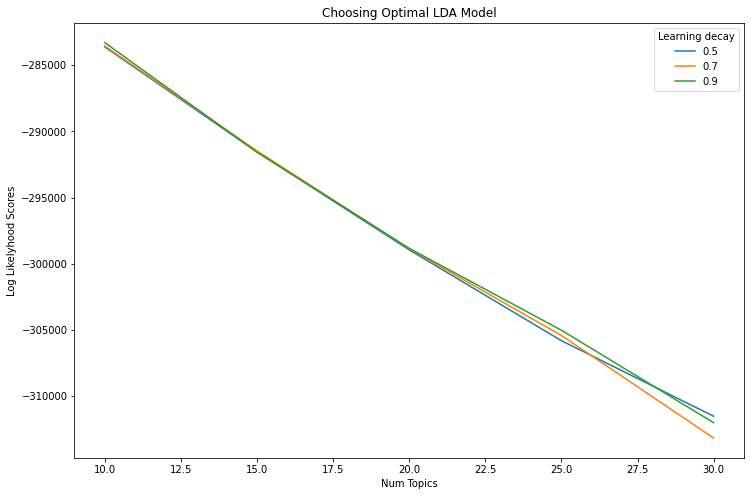

In [106]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]


log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) 
                     for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.5]

log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) 
                     for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.7]

log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) 
                     for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.9]


# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [107]:
df.columns

Index(['topic_id', 'no_sw_LDA_text', 'token_NN_text'], dtype='object')

In [108]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df.no_sw_LDA_text))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [109]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution.sort_values(by='Topic Num')

Topic Num  Num Documents
8          0            127
3          1            219
7          2            133
4          3            202
5          4            163
0          5            380
9          6            107
1          7            348
6          8            159
2          9            279

<a id='coherent_model'></a>

# Coherent LDA model

In [110]:
pyLDAvis.enable_notebook()

plot = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
plot

/home/criuser/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  16.319174
4       0.648955  71.707100       2        1  15.788455
5      71.019684   9.971006       3        1  14.606864
7       3.785981  33.185135       4        1  11.402285
1     -42.666500  -9.222070       5        1  10.872611
8      -3.621689 -43.526516       6        1   8.271223
0      -3.632402  -4.171708       7        1   7.100037
2     -36.584400  35.804413       8        1   6.044340
3      44.391380  50.615383       9        1   4.929092
6      40.235809 -31.591665      10        1   4.665919, topic_info=        Term         Freq        Total Category  logprob  loglift
456     data  8741.000000  8741.000000  Default  30.0000  30.0000
733     food   956.000000   956.000000  Default  29.0000  29.0000
1980     zeo  1051.000000  1051.000000  Default  28.0000  28.0000
844    heart  1221.000000  1221.000000  Default  27.0000  27.0000
837   health  1518.000000  1518.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
849     help    65.309333   985.380660  Topic10  -4.9398   0.3510
1031   level    60.447657   766.315495  Topic10  -5.0171   0.5251
1959    work    60.996759  1559.754327  Topic10  -5.0081  -0.1766
456     data    67.072934  8741.073519  Topic10  -4.9131  -1.8051
514   device    55.412422  1840.924294  Topic10  -5.1041  -0.4383

[672 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1         4  0.249422  abramson
1         8  0.698382  abramson
6         1  0.055171    access
6         2  0.312108    access
6         3  0.360973    access
...     ...       ...       ...
1977      6  0.210830      york
1979      3  0.877132  zenobase
1979      5  0.103871  zenobase
1979      6  0.011541  zenobase
1980      2  0.999057       zeo

[2491 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 6, 8, 2, 9, 1, 3, 4, 7])

In [111]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

ability   abramson   absence  absolute  acceleration  accelerometer  \
Topic0  18.809014   0.100008  0.100064  0.100031      5.242336       0.100005   
Topic1   9.905187   0.100010  3.588545  0.100014      0.100007       3.229220   
Topic2  11.009566  13.956326  1.400413  0.100024      0.100032       0.100045   
Topic3   0.100022   0.100011  0.100008  0.100004      6.475913       0.100009   
Topic4  30.752198   0.100001  3.306644  1.024736      0.263682      16.743366   

            access    account   accuracy  accurate  ...     yield      yoga  \
Topic0    3.602480   1.272275   0.148912  0.100022  ...  0.100032  0.100010   
Topic1  126.798366  66.859274   3.155948  5.695091  ...  4.471704  0.100039   
Topic2   12.037653   0.100019   0.100039  0.100057  ...  0.111906  0.100006   
Topic3    7.218509   8.359815   0.100015  1.941557  ...  2.464022  9.755616   
Topic4  205.728604  10.721505  11.320647  3.867137  ...  1.790313  0.100006   

            york   youtube  zenobase          zeo    zephyr       zero  \
Topic0  0.100036  0.100031  0.100010     0.100006  0.100000   0.100014   
Topic1  0.100009  3.837936  8.944944     0.100010  0.100003   0.100023   
Topic2  0.100022  1.986120  0.100016     0.100010  0.100010   0.100002   
Topic3  0.100005  0.100014  0.100006     0.100002  0.100002   0.100001   
Topic4  0.100010  5.477858  0.102306  1090.044078  4.555980  10.987226   

            zone      zoom  
Topic0  6.049161  0.100021  
Topic1  3.854368  0.100009  
Topic2  0.100017  0.100005  
Topic3  0.100016  4.524078  
Topic4  5.172512  1.131864  

[5 rows x 1985 columns]

### Top 15 keywords in each topic

In [112]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0   Word 1    Word 2  Word 3       Word 4    Word 5      Word 6  \
Topic 0    mood   people      data    card     question      idea       point   
Topic 1    data   people    health    work  information  analysis    question   
Topic 2  health     test     blood  doctor          air    sensor       level   
Topic 3  health  tracker    people    tool         goal  activity     fitness   
Topic 4    data      zeo       app    file        sleep   version    headband   
Topic 5    data   device       app    user         tool   service      export   
Topic 6    test   effect    result   study       survey     brain  meditation   
Topic 7  people  project  question   habit     research      idea        book   
Topic 8    food     body   calorie   blood        water    effect        meal   
Topic 9   heart     rate      data  device       sensor       hrv     measure   

              Word 7       Word 8   Word 9       Word 10     Word 11  \
Topic 0      measure        track    scale       emotion       quote   
Topic 1         tool         self     term       service       share   
Topic 2       device      product  quality          home     company   
Topic 3   technology       survey     self          step    research   
Topic 4         work        night     post         phone     battery   
Topic 5     activity          api    track      software      source   
Topic 6   experiment     question  measure  intervention        pill   
Topic 7         self    community   change          mood  experience   
Topic 8          eat        track   weight      exercise       sugar   
Topic 9  temperature  measurement  monitor         sleep      stress   

            Word 12  Word 13      Word 14  
Topic 0       entry  problem        image  
Topic 1    research  company       result  
Topic 2    consumer   people          lab  
Topic 3  conference   fitbit   university  
Topic 4      export     unit  information  
Topic 5        work  feature       access  
Topic 6       score     mind     headache  
Topic 7        help     work         post  
Topic 8        loss   muscle        level  
Topic 9    activity    watch        night

In [113]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [114]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-']
                                   else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [115]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["sleep"]
topic, prob_scores = predict_topic(text = mytext)
print(topic)

['data', 'zeo', 'app', 'file', 'sleep', 'version', 'headband', 'work', 'night', 'post', 'phone', 'battery', 'export', 'unit', 'information']


<a id='cluster_topic'></a>

## Cluster documents with similair topics

In [116]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.15  0.27  0.15  0.26  0.2   0.57  0.11  0.57  0.15  0.31]
 [ 0.03  0.04  0.02  0.09 -0.13 -0.61  0.    0.73 -0.03 -0.24]]
Perc of Variance Explained: 
 [0.03 0.2 ]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

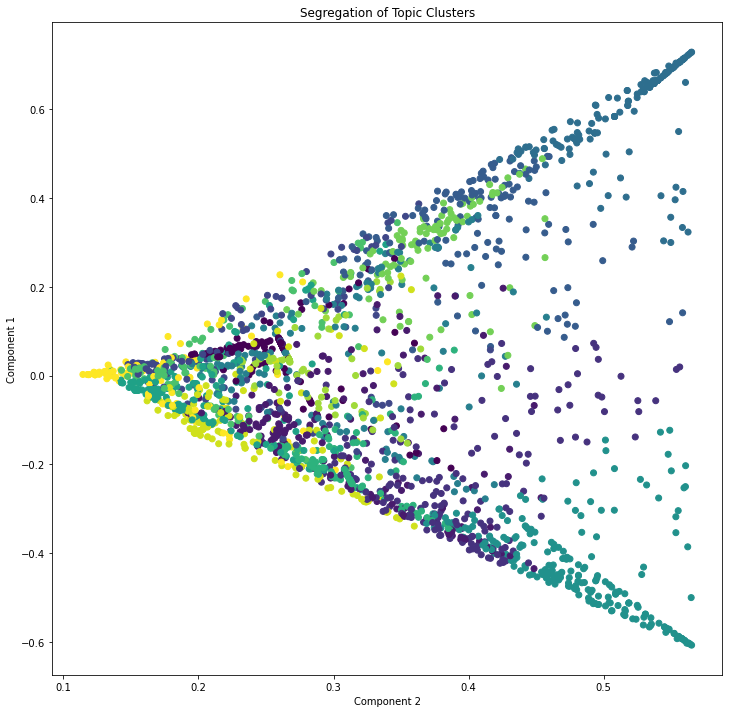

In [117]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.ylabel('Component 1')
plt.title("Segregation of Topic Clusters", )

<a id='similar_topic'></a>

## similar documents by entering text + Create dashboard

In [118]:
global_df.columns

Index(['id', 'user_id', 'created_at', 'cooked', 'post_number', 'updated_at',
       'reply_count', 'reply_to_post_number', 'quote_count',
       'incoming_link_count', 'reads', 'readers_count', 'topic_id',
       'reply_to_user', 'stream', 'tags', 'title', 'posts_count', 'views',
       'like_count', 'closed', 'category_id', 'word_count', 'featured_link',
       'time_read', 'likes_received', 'likes_given', 'topics_entered',
       'topic_count', 'post_count', 'posts_read', 'days_visited', 'username',
       'name', '_merge', 'first_post', 'last_post', 'lifespan',
       'lifespan_days', 'cleaned_text', 'lemmat_text', 'token_text',
       'no_sw_text', 'noHTML_text', 'lemma_LDA_text', 'no_sw_LDA_text',
       'token_NN_text', 'creation_date', 'creation_year'],
      dtype='object')

In [119]:
from sklearn.metrics.pairwise import euclidean_distances

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def similar_documents(text, doc_topic_probs, documents = global_df.cleaned_text, nlp=nlp, top_n=5, verbose=False):
    topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:        
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 1))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
    return doc_ids, np.take(documents, doc_ids)

In [123]:
# Get similar documents
mytext = ["Some text about science and health"]
doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = global_df.cleaned_text, top_n=1, verbose=True)
print('\n', docs)

Topic KeyWords:  ['health', 'tracker', 'people', 'tool', 'goal', 'activity', 'fitness', 'technology', 'survey', 'self', 'step', 'research', 'conference', 'fitbit', 'university']
Topic Prob Scores of text:  [[0.  0.  0.  0.8 0.  0.  0.  0.  0.  0. ]]
Most Similar Doc's Probs:   [[0.  0.  0.  0.8 0.  0.  0.  0.  0.  0. ]]

 757    microbiome sequenced multiple times changing diet traveling interesting educational expect major insights data limited
Name: cleaned_text, dtype: object


<a id='dominant_topic'></a>

# Dominant topic in each sentence

In [126]:
def format_topics_sentences(ldamodel= lda_model, corpus= corpus, texts = data_vectorized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel= best_lda_model, corpus= corpus, texts= data_vectorized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

TypeError: 'LatentDirichletAllocation' object is not subscriptable

In [127]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

NameError: name 'df_topic_sents_keywords' is not defined

# Topic distribution across posts/topics 

In [128]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

NameError: name 'df_topic_sents_keywords' is not defined

In [129]:
len(global_df)

10282

## 2

<a id='ner'></a>

## Named Entity Recognition

In [130]:
"""conducted on Cortext platform"""

'conducted on Cortext platform'

In [131]:
org_name = pd.read_csv('name_entity/org-name.csv')
product_name = pd.read_csv('name_entity/product-name-tsv.csv')
works = pd.read_csv('name_entity/work-of-art-tsv.csv', sep="\t")
person_name = pd.read_csv('name_entity/person.csv', sep="\t")
event_name = pd.read_csv('name_entity/event.csv', sep="\t")
loc1 = pd.read_csv('name_entity/loc1.csv', sep="\t")
loc2 = pd.read_csv('name_entity/location2.csv', sep="\t")

In [132]:
org_name = org_name.dropna()
product_name = product_name.dropna()
works = works.dropna()
person_name = person_name.dropna()
event_name = event_name.dropna()
loc1 = loc1.dropna()
loc2 = loc2.dropna()

In [133]:
print(len(loc1))
print(len(loc2))

19
37


In [134]:
location = pd.concat([loc1, loc2], ignore_index=True)

In [135]:
org_name['category'] = 'ORG'
product_name['category'] = 'PRODUCT'
works['category'] = 'WORKS'
person_name['category'] = 'PERSON'
event_name['category'] = 'EVENT'
location['category'] = 'LOCATION'

In [138]:
org_name.sort_values(by="frequency", ascending= False)

entity  frequency category
0       QS       2150      ORG
1      HRV        917      ORG
2      Zeo        706      ORG
3   iPhone        393      ORG
4      EEG        333      ORG
..     ...        ...      ...
75     PDF         29      ORG
76     PPG         29      ORG
77   Nexus         28      ORG
78    WHIB         28      ORG
79      PS         28      ORG

[80 rows x 3 columns]

In [139]:
org_name = org_name.dropna()

In [140]:
org_name.entity.items

<bound method Series.items of 0         QS
1        HRV
2        Zeo
3     iPhone
4        EEG
       ...  
75       PDF
76       PPG
77     Nexus
78      WHIB
79        PS
Name: entity, Length: 80, dtype: object>

In [141]:
import plotly.graph_objs as go

In [148]:
data = dict(org_name)

In [143]:
# function to vizualise data on wordcloud

def str_list(mylist):
    mylist = mylist.tolist()
    mylist = str(mylist)
    mylist = tokenize_text(mylist)
    mylist = ' '.join(map(str, mylist))
    return mylist

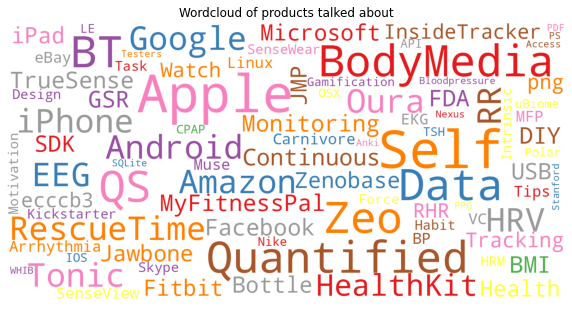

In [144]:
org_list = str_list(org_name.entity)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1600, height=800, max_font_size=150, max_words=100, colormap='Set1', background_color="white", collocations=True).generate(org_list)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of products talked about')
plt.axis("off")
plt.show()

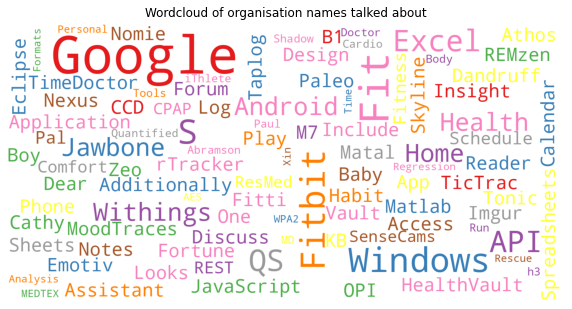

In [145]:
# Create and generate a word cloud image:
product = str_list(product_name.entity)
wordcloud = WordCloud(width=1600, height=800, max_font_size=150, max_words=100, colormap='Set1', collocations=True, background_color="white").generate(product)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of organisation names talked about')
plt.axis("off")
plt.show()

In [147]:
fig = px.scatter(org_name, x='frequency', y='entity', text='entity', size='frequency', color='frequency', size_max=45
                 , template='plotly_white', title='Bigram similarity and frequency', labels={'words': 'Avg. Length<BR>(words)'}
                 , color_continuous_scale=px.colors.sequential.Sunsetdark)
fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()